# Credit Risk Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import joblib

In [2]:
df = pd.read_csv('german_credit_data.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB
None


In [5]:
print(df.describe())

        Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000


In [6]:
df_processed = df.drop('Unnamed: 0', axis=1)

In [7]:
df_processed

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [8]:
print(df_processed['Checking account'].isnull().sum())
print(df_processed['Saving accounts'].isnull().sum())

394
183


In [9]:
df_processed['Checking account'].fillna('no_info', inplace=True)
df_processed['Saving accounts'].fillna('no_info', inplace=True)
df_processed.head()

/tmp/ipython-input-133955923.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Checking account'].fillna('no_info', inplace=True)
/tmp/ipython-input-133955923.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,no_info,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,no_info,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [10]:
credit_threshold = df['Credit amount'].median()
duration_threshold = df['Duration'].median()
print(credit_threshold, duration_threshold)

2319.5 18.0


In [11]:
# Create Target Variable (Risk Column)
df_processed['Risk'] = np.where(
    ((df['Credit amount'] > credit_threshold) & (df['Saving accounts'] == 'little') | (df['Duration'] > duration_threshold) & (df['Saving accounts'] == 'little')),
    0,
    1
)

In [12]:
df_processed

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,no_info,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,no_info,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,no_info,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,0
997,38,male,2,own,little,no_info,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


In [13]:
# Encode Categorical Columns
label_encoders = {}
for col in df_processed.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le   # Save encoders for Streamlit later

In [14]:
# A feature "Credit per month"
df_processed['Credit_per_month'] = df_processed['Credit amount'] / (df_processed['Duration'] + 1)  # +1 to avoid division by zero

In [15]:
# 3. Splitting Data

X = df_processed.drop('Risk', axis=1)
y = df_processed['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X.shape, y.shape

((1000, 10), (1000,))

In [17]:
# 4. Scaling Features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# 5. Model Training with Random Forest
rfc = RandomForestClassifier(random_state=42)

In [19]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [20]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [21]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [22]:
best_model = grid_search.best_estimator_

In [23]:
best_model

RandomForestClassifier(max_depth=10, random_state=42)

In [24]:
# 6. Model Evaluation

y_pred = best_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00       130

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [25]:
accuracy_score(y_test, y_pred)

1.0

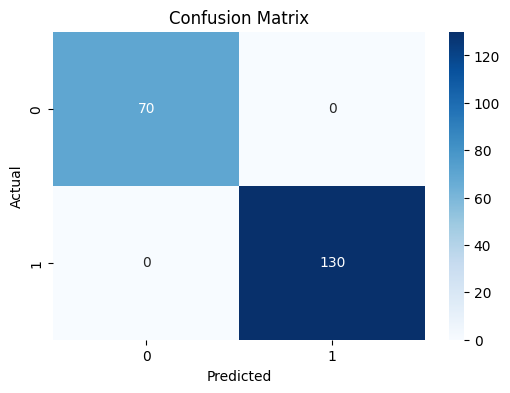

In [26]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [28]:
print(feature_importances)

            Feature  Importance
4   Saving accounts    0.430118
6     Credit amount    0.249810
7          Duration    0.179685
9  Credit_per_month    0.078694
0               Age    0.018678
5  Checking account    0.017809
8           Purpose    0.010573
2               Job    0.006387
3           Housing    0.005333
1               Sex    0.002913


In [29]:
import os
os.makedirs('models', exist_ok=True)


In [30]:
joblib.dump(best_model, 'models/best_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(label_encoders, 'models/label_encoders.pkl')

['models/label_encoders.pkl']